# Basic outline of polymer loading with OpenFF and our tools

## Basic imports

In [1]:
# Supressing annoying warnings (!must be done first!)
import warnings
warnings.catch_warnings(record=True)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Logging
from polymerist.genutils.logutils.IOHandlers import LOG_FORMATTER

import logging
logging.basicConfig(
    level=logging.INFO,
    format =LOG_FORMATTER._fmt,
    datefmt=LOG_FORMATTER.datefmt,
    force=True
)
LOGGER = logging.getLogger(__name__)

## Defining paths to PDB and monomer template files

In [2]:
from pathlib import Path
from polymerist.genutils.fileutils.pathutils import assemble_path


pdb_dir = Path('polymer_examples/compatible_pdbs/simple_polymers')
mono_dir = Path('polymer_examples/monomer_generation/json_files/')

mol_name = 'polyvinylchloride'

pdb_path  = assemble_path(pdb_dir, mol_name, extension='pdb')
mono_path = assemble_path(mono_dir, mol_name, extension='json')

for path in (pdb_path, mono_path):
    assert(path.exists())

## Create Monomer Group

polyvinylchloride


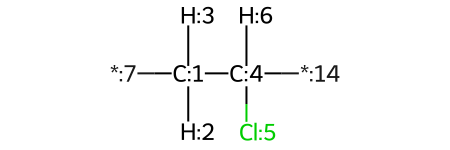

polyvinylchloride_TERM2


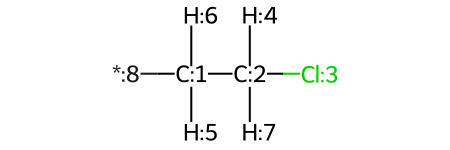

polyvinylchloride_TERM4


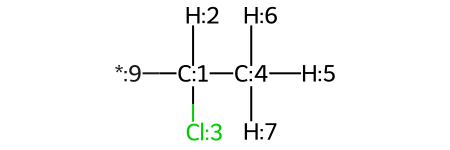

In [3]:
from polymerist.monomers import MonomerGroup

grp = MonomerGroup.from_file(mono_path)
for resname, mol in grp.iter_rdmols():
    print(resname)
    display(mol)

## Load topology with substructures, generate partition

In [4]:
from openff.toolkit import Topology, Molecule
from polymerist.openfftools import topology
from polymerist.residues.partition import partition

offtop = Topology.from_pdb(pdb_path, _custom_substructures=grp.monomers)
was_partitioned = partition(offtop)
assert(was_partitioned)

offmol = topology.get_largest_offmol(offtop)
display(offmol)

NGLWidget()

In [9]:
from openff.toolkit import ForceField
from openff.interchange import Interchange
from polymerist.openfftools import FFDIR

ff = ForceField(str(FFDIR / 'openff-2.0.0.offxml'))
inc = Interchange.from_smirnoff(ff, offtop)

2023-11-02 15:24:42.095 [INFO    :      parameters:line 2993] - Attempting to up-convert Electrostatics section from 0.3 to 0.4
2023-11-02 15:24:42.096 [INFO    :      parameters:line 3003] - Successfully up-converted Electrostatics section from 0.3 to 0.4. `method="PME"` is now split into `periodic_potential="Ewald3D-ConductingBoundary"`, `nonperiodic_potential="Coulomb"`, and `exception_potential="Coulomb"`.


In [10]:
inc.to_gromacs('demo')

ValidationError: 1 validation error for GROMACSAtom
residue_index
  ensure this value is greater than 0 (type=value_error.number.not_gt; limit_value=0)